***
**Relative vs Regular Frequency Histogram Analysis**
***

*By Jared Kelnhofer, 10-01-2020*

**<font size="5">Goal/Definitions:</font>**

The goal of this project is to find out whether or not a relative frequency distribution of a given dataset will look different than a regular frequency distribution of that dataset, when plotted as a histogram. My hypothesis is that the relative frequency histogram will look the same as the regular frequency histogram with regards to the ratio of the heights of the bars. By this, I mean that the graph might stretch or shrink vertically, but overall, the relationships between the class frequencies should be the same. Of course, I could just do this on paper, but this is more interesting.

First, I'd better get some terms out of the way. 

The **frequency** of a given class is defined as the amount of times that class occurs in the dataset. If I have a bag of fruit, and thereare 3 oranges in the bag, than the class "orange" has a frequency of 3.

The **relative frequency** of a class is defined as the percentage that class takes up of the dataset. If my fruit bag has 12 fruit in it, and only 3 of those fruit are oranges, than the relative frequency of the oranges is 25%. (The formula for calculating the relative frequency of a class is simple: take the number of times that a class occurred, and divide it by the total size of the dataset. Then divide that number by 100.) 

We're just turning a fraction into a decimal, which is one reason for my hypothesis that the relationship between classes will remain the same -- we're saying, "Well I know how much this class takes up out of my dataset, but if the dataset was of size 100 how much would take up?" We're changing the container size, but not the underlying information in my view.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

I'll create a generate_dataset function which generates a dataset of random whole numbers within a range. Each unique number is treated as it's own class. If I have two 7's in the dataset, than the frequency of the "7" class is 2.

I'll also make a get_class_frequencies method, which takes a dataset, and returns an array containing the counts of each class at that index. So if you want to know how many times "2" showed up in your dataset, go check out the get_class array at index 2.

In [2]:
def generate_dataset(class_count, dataset_size):
    dataset = np.random.randint(low=0, high=class_count, size=dataset_size)
    return dataset
 
def get_class_frequencies(dataset, class_count):
    encountered_classes = []
    class_counts = np.zeros(class_count)
    
    for i in range(0, dataset.size):# using a "for in" didn't work here when I iterated over dataset. Why?
        
        if dataset[i] in encountered_classes:
            class_counts[dataset[i]]+=1
        else:
            encountered_classes.append(dataset[i])
            class_counts[dataset[i]]+=1
    
    return class_counts

Testing the dataset creation and frequency counting methods:

In [3]:
num_classes = 4
dataset_size = 20

my_dataset = generate_dataset(num_classes, dataset_size)
print("dataset:")
print(my_dataset)
print("")

my_frequencies = get_class_frequencies(my_dataset, num_classes)
print("frequencies")
print(my_frequencies)

dataset:
[3 1 1 3 2 0 0 2 2 3 1 2 2 2 1 2 0 0 1 2]

frequencies
[4. 5. 8. 3.]


I need an index so the histogram knows what to label things! Otherwise, it'll think that my_frequencies is the dataset.

In [4]:
def add_index(array):
    
    index_array = np.arange(0, array.size)
    array = np.vstack([index_array, array])
    
    return array

In [5]:
print("my_frequencies before add_index:")
print(my_frequencies)

my_frequencies = add_index(my_frequencies)

print("my_frequencies after add_index")
print(my_frequencies)

my_frequencies before add_index:
[4. 5. 8. 3.]
my_frequencies after add_index
[[0. 1. 2. 3.]
 [4. 5. 8. 3.]]


I'm using a bar graph becaust plt's "hist" method automatically does the counting of class instances. I did that myself with get_class_frequencies, so I'll plot the frequencies against the index (class name) for the same result.

In [6]:
def plot_histogram(array):
    plt.bar(array[0], array[1])

frequencies are: [[0. 1. 2. 3.]
 [4. 5. 8. 3.]]


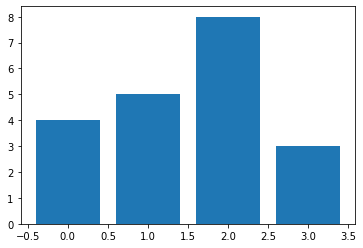

In [7]:
print("frequencies are: " + str(my_frequencies))
plot_histogram(my_frequencies)

Now I'll make a method transform my frequency values to be relative frequencies so I can compare the histograms.

In [8]:
def convert_to_relative_frequencies(frequencies):
    
    relative_frequency_array = []
    total_values = 0
    
    for i in range (0, frequencies.size):
        total_values += frequencies[i]
    
    for i in range (0, frequencies.size):
        relative_frequency_array.append((frequencies[i] / total_values) * 100)
        
    return np.array(relative_frequency_array)#append() turns it to a list

And now a test of the method. The relative frequencies should add to 100. 

In [9]:
my_relative_frequencies = convert_to_relative_frequencies(my_frequencies[1])
print("relative frequencies: " + str(my_relative_frequencies))

total = 0
for i in range(0, my_relative_frequencies.size):
    total += my_relative_frequencies[i]
print("The total is: " + str(total))

relative frequencies: [20. 25. 40. 15.]
The total is: 100.0


Cool! Now I'll make the my_relative_frequencies array have it's own index, which in this case will perfectly name
our classes! Then I'll plot the histogram!

relative frequencies are: [[ 0.  1.  2.  3.]
 [20. 25. 40. 15.]]


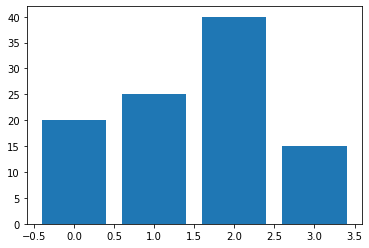

In [10]:
my_relative_frequencies = add_index(my_relative_frequencies)

print("relative frequencies are: " + str(my_relative_frequencies))
plot_histogram(my_relative_frequencies)

Now I'll graph both of the frequency distributions side by side with some pretty labels and (maybe) sizing for comparison:

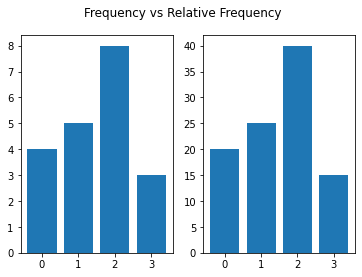

In [11]:
plt.subplot(121,)
plot_histogram(my_frequencies)
plt.subplot(122)
plot_histogram(my_relative_frequencies)
plt.suptitle("Frequency vs Relative Frequency")
plt.show()

From looking at the two graphs, we can determine that the hypothesis indeed appears to be correct. Let's run the test a bunch of times to make sure that it's not a coincidence.

In [12]:
def run_n_tests(num_tests, num_classes, dataset_size):
    
    for i in range(0, num_tests):
        
        dataset = generate_dataset(num_classes, dataset_size)
        frequencies = get_class_frequencies(dataset, num_classes)
        relative_frequencies = convert_to_relative_frequencies(frequencies)
        
        frequencies = add_index(frequencies)
        relative_frequencies = add_index(relative_frequencies)
        
        plt.subplot(121,)
        plot_histogram(frequencies)
        plt.subplot(122)
        plot_histogram(relative_frequencies)
        plt.suptitle("Dataset " + str(i))
        plt.show()

Now I'll run some of the tests!

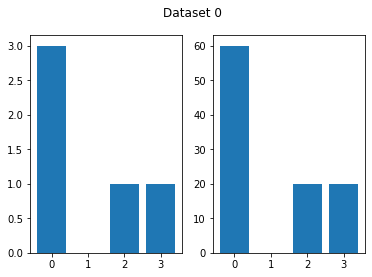

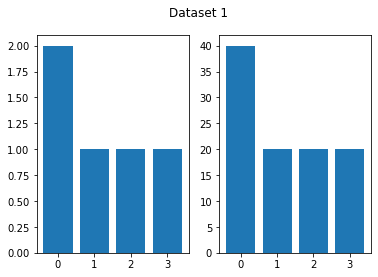

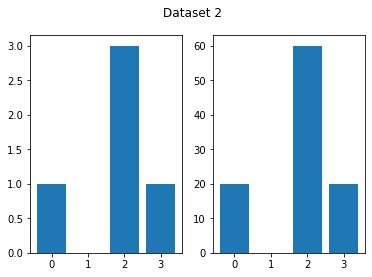

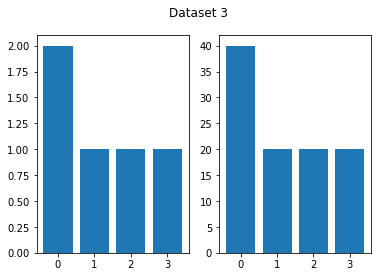

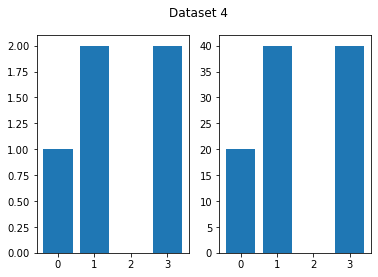

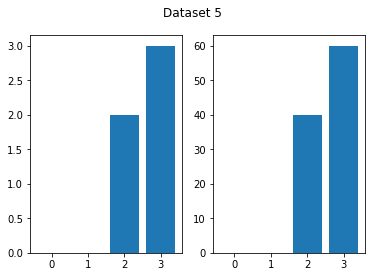

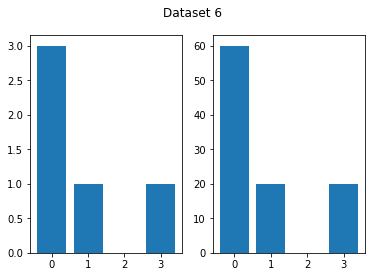

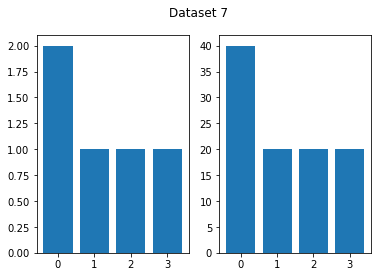

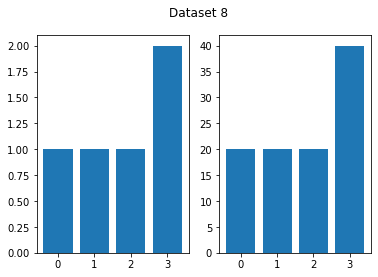

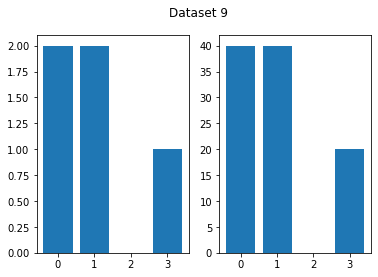

In [13]:
run_n_tests(10, 4, 5)

Well, that settles it for me! No need to waste time writing up a proof or thinking about this. It looks convincing.

The end!